In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from scipy.stats import randint
from sklearn import metrics
from sklearn.model_selection import train_test_split
import random

In [2]:
# Study data files
Airline_path = "data/Fixed_flight.csv"

Airline = pd.read_csv(Airline_path, header=0,  index_col=0)

for column in Airline.columns:
    print(f"Column {column} has {Airline[column].isnull().sum()} null values")
    
Airline = Airline.dropna().reset_index()


FileNotFoundError: [Errno 2] No such file or directory: 'data/Fixed_flight.csv'

In [3]:
Airline

,index,MONTH,DAY,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,DELAYED
0,0,1,1,AS,ANC,SEA,-11.0,0
1,1,1,1,AA,LAX,PBI,-8.0,0
2,2,1,1,US,SFO,CLT,-2.0,0
3,3,1,1,AA,LAX,MIA,-5.0,0
4,4,1,1,AS,SEA,ANC,-1.0,0
...,...,...,...,...,...,...,...,...
2828865,2889507,6,30,UA,LAX,ORD,-1.0,0
2828866,2889508,6,30,UA,LAX,IAH,90.0,1
2828867,2889509,6,30,UA,PDX,IAH,113.0,1
2828868,2889510,6,30,UA,SEA,IAH,13.0,1


In [4]:
Airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2828870 entries, 0 to 2828869
Data columns (total 8 columns):
 #   Column               Dtype  
---  ------               -----  
 0   index                int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   AIRLINE              object 
 4   ORIGIN_AIRPORT       object 
 5   DESTINATION_AIRPORT  object 
 6   DEPARTURE_DELAY      float64
 7   DELAYED              int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 172.7+ MB


In [5]:
Airline.isna().sum()

index                  0
MONTH                  0
DAY                    0
AIRLINE                0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
DEPARTURE_DELAY        0
DELAYED                0
dtype: int64

In [6]:
Airline.describe()

,index,MONTH,DAY,DEPARTURE_DELAY,DELAYED
count,2.828870e+06,2.828870e+06,2.828870e+06,2.828870e+06,2.828870e+06
mean,1.451288e+06,3.574100e+00,1.562637e+01,1.039014e+01,3.907698e-01
std,8.332015e+05,1.704039e+00,8.704703e+00,3.835389e+01,4.879230e-01
min,0.000000e+00,1.000000e+00,1.000000e+00,-6.800000e+01,0.000000e+00
25%,7.308972e+05,2.000000e+00,8.000000e+00,-5.000000e+00,0.000000e+00
50%,1.457108e+06,4.000000e+00,1.600000e+01,-1.000000e+00,0.000000e+00
75%,2.170847e+06,5.000000e+00,2.300000e+01,9.000000e+00,1.000000e+00
max,2.889511e+06,6.000000e+00,3.100000e+01,1.988000e+03,1.000000e+00


In [7]:
Airline.columns

Index(['index', 'MONTH', 'DAY', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'DELAYED'],
      dtype='object')

In [8]:
Airline =Airline.sample(n=100000, random_state=42)

In [9]:
X_cat = Airline[['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']]
X_num = Airline.drop(['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DELAYED'], axis=1)
X_num

,index,MONTH,DAY,DEPARTURE_DELAY
1490201,1533242,4,9,-5.0
733682,757549,2,19,-9.0
612811,632580,2,11,0.0
2255483,2306163,5,27,-2.0
2016340,2065028,5,12,-2.0
...,...,...,...,...
163598,167819,1,11,-2.0
1790285,1836742,4,27,4.0
841826,871650,2,27,0.0
2369584,2422222,6,3,-1.0


In [10]:
X_cat

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT
1490201,B6,SJU,BOS
733682,EV,CLE,MKE
612811,AA,LGA,ORD
2255483,WN,SMF,DAL
2016340,AA,MSY,MIA
...,...,...,...
163598,US,CLT,MCO
1790285,OO,IAH,JAX
841826,WN,MSY,ATL
2369584,DL,FLL,DTW


In [11]:
# Catagorize all the non number data (Flight locations, Airlines)
X_cat = pd.get_dummies(X_cat, drop_first=True)
X_cat

,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,...,DESTINATION_AIRPORT_TYS,DESTINATION_AIRPORT_UST,DESTINATION_AIRPORT_VEL,DESTINATION_AIRPORT_VLD,DESTINATION_AIRPORT_VPS,DESTINATION_AIRPORT_WRG,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM
1490201,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
733682,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
612811,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2255483,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016340,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163598,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1790285,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
841826,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2369584,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Scale just the number data of the X-axis and add it to the catagorized dataframe as is.
# Make it your new X-axis with the Y-axis being delayed or not
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)
X = pd.concat([X_scaled, X_cat], axis=1)
y = Airline['DELAYED']

In [13]:
X.head()

,index,MONTH,DAY,DEPARTURE_DELAY,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,...,DESTINATION_AIRPORT_TYS,DESTINATION_AIRPORT_UST,DESTINATION_AIRPORT_VEL,DESTINATION_AIRPORT_VLD,DESTINATION_AIRPORT_VPS,DESTINATION_AIRPORT_WRG,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM
1490201,0.097284,0.248391,-0.757886,-0.401836,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
733682,-0.834365,-0.926006,0.390886,-0.505788,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
612811,-0.984460,-0.926006,-0.528132,-0.271895,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2255483,1.025603,0.835590,1.309903,-0.323871,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016340,0.735987,0.835590,-0.413255,-0.323871,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
X.isna().sum()

index                      0
MONTH                      0
DAY                        0
DEPARTURE_DELAY            0
AIRLINE_AS                 0
                          ..
DESTINATION_AIRPORT_WRG    0
DESTINATION_AIRPORT_WYS    0
DESTINATION_AIRPORT_XNA    0
DESTINATION_AIRPORT_YAK    0
DESTINATION_AIRPORT_YUM    0
Length: 654, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# Using AffinityPropgation to clean inf / nan values for logistic regression and following models to perform

import pandas as pd
from sklearn.cluster import AffinityPropagation


In [17]:
df = pd.DataFrame(Airline)

In [18]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.fillna(0)

In [19]:
data = df.to_numpy()
print(data)

[[1533242 4 9 ... 'BOS' -5.0 0]
 [757549 2 19 ... 'MKE' -9.0 0]
 [632580 2 11 ... 'ORD' 0.0 0]
 ...
 [871650 2 27 ... 'ATL' 0.0 0]
 [2422222 6 3 ... 'DTW' -1.0 0]
 [605187 2 10 ... 'MIA' -4.0 0]]


In [20]:
# af= AffinityPropagation(random_state=5).fit(data)
# print(af.cluster_centers_)

# Logistic Regresssion

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [22]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [23]:

classifier.fit(X_train, y_train)

C:\Users\Und3a\anaconda3\envs\PythonData38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9977666666666667
Testing Data Score: 0.9952


# Random Forest Classifier

In [25]:
# Train a Random Forest Classifier model and print the model score
from sklearn.ensemble import RandomForestClassifier

In [26]:
# Scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
randomForestClass = RandomForestClassifier(random_state=42)
randomForestClass.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
print("RandomForestClassifier score: ", randomForestClass.score(X_test,y_test))

RandomForestClassifier score:  1.0


In [29]:
# Create a RandomForestClassifier model, fit it to the data, and print the model's score.
randomForestClass_scaled = RandomForestClassifier(random_state=42)
randomForestClass_scaled.fit(X_train_scaled, y_train)
print("RandomForestClassifier scaled score: ", randomForestClass_scaled.score(X_test_scaled, y_test))

RandomForestClassifier scaled score:  1.0


# Confusion Matrix

In [30]:
from sklearn.metrics import confusion_matrix

y_true = y_test
y_pred = classifier.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[6110,    0],
       [  48, 3842]], dtype=int64)

In [31]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn) # (111 + 128) / (111 + 5 + 128 + 6)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9952


# Plots

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [33]:
# Size for images
mpl.rcParams['figure.figsize'] = (17,10)
mpl.rcParams['font.size'] = 20

<AxesSubplot:>

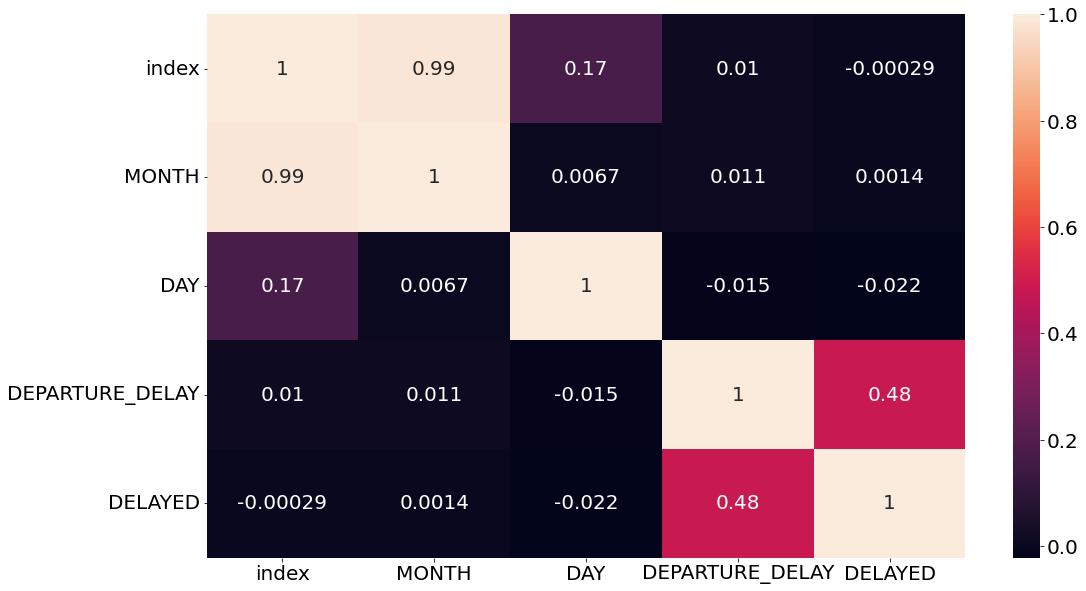

In [34]:
sns.heatmap(Airline.corr(), annot=True)

<AxesSubplot:xlabel='DAY', ylabel='count'>

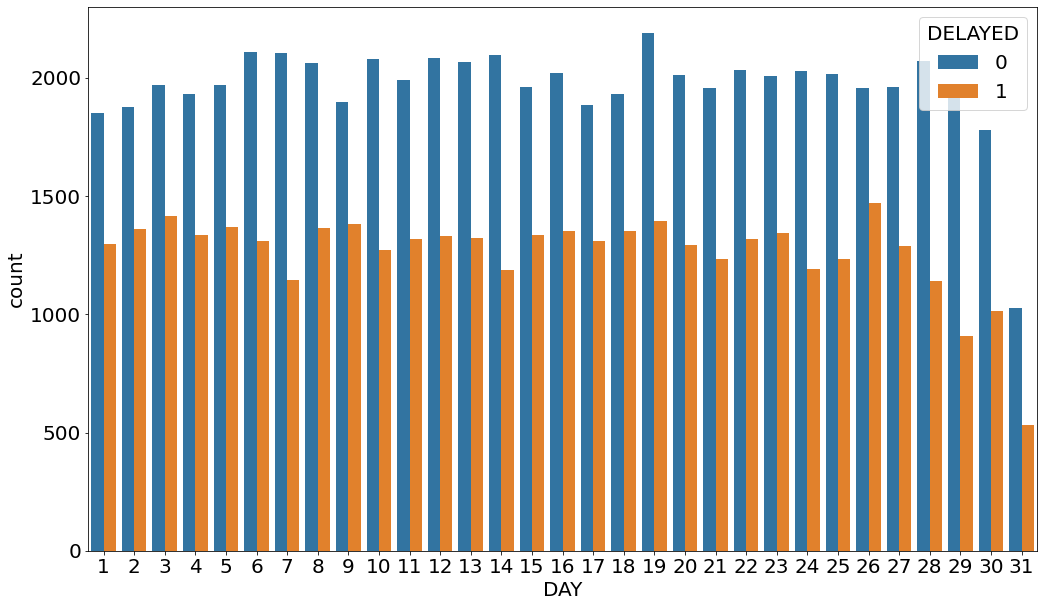

In [35]:
sns.countplot(data=Airline, x='DAY', hue='DELAYED')

<AxesSubplot:xlabel='AIRLINE', ylabel='Count'>

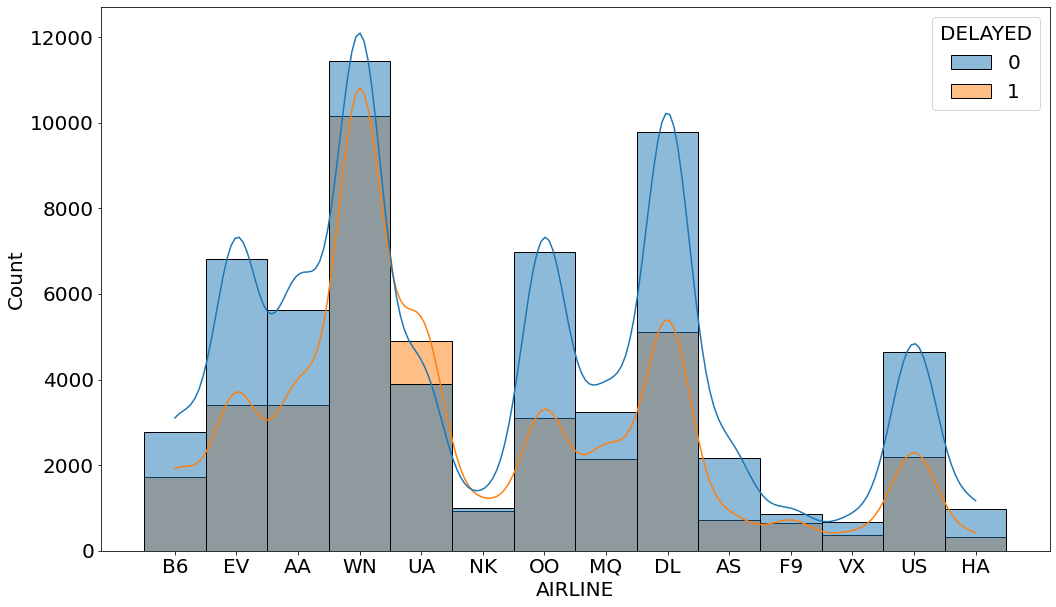

In [36]:
sns.histplot(data=Airline, x='AIRLINE', hue='DELAYED', kde=True)

<AxesSubplot:xlabel='DAY', ylabel='Count'>

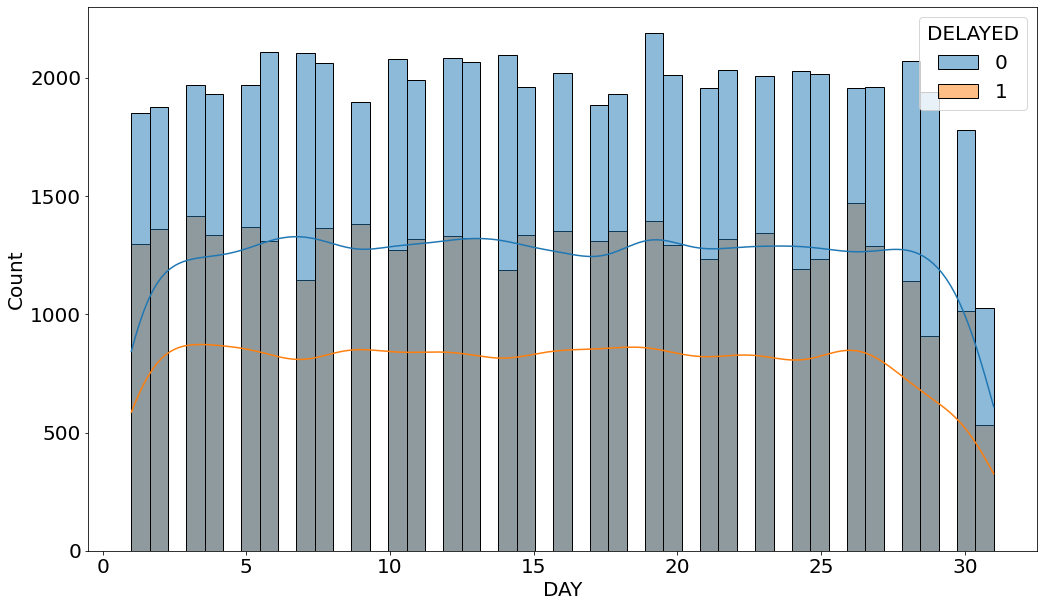

In [37]:
sns.histplot(data=Airline, x='DAY', hue='DELAYED', kde=True)

<AxesSubplot:xlabel='ORIGIN_AIRPORT', ylabel='count'>

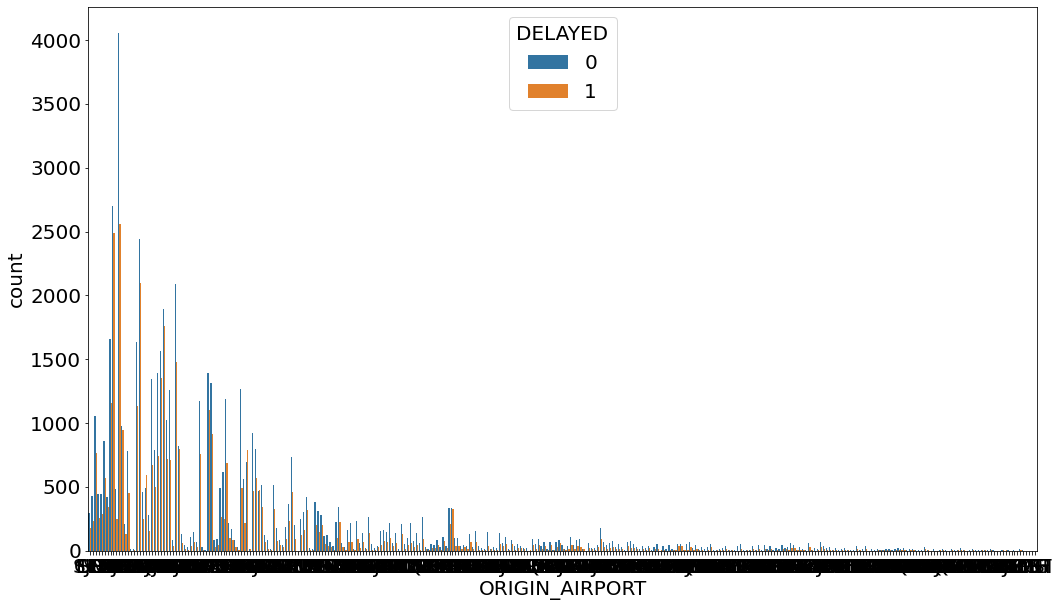

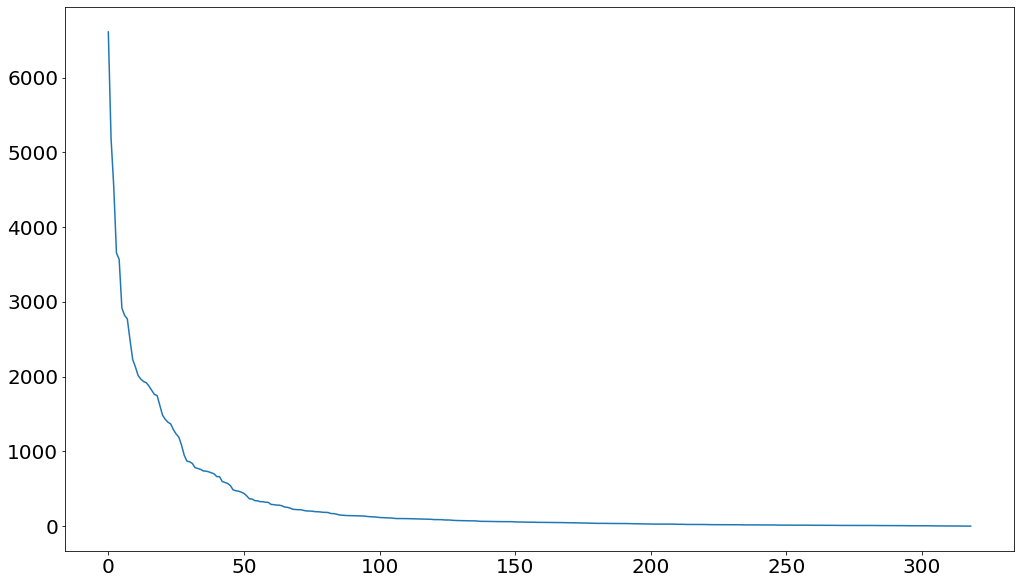

In [39]:
airfrom = Airline['ORIGIN_AIRPORT'].value_counts()
plt.plot(range(len(airfrom)), airfrom)

In [40]:
Airline['ORIGIN_AIRPORT'] = Airline['ORIGIN_AIRPORT'].apply(lambda s: s if str(s) in airfrom[:50] else 'others')

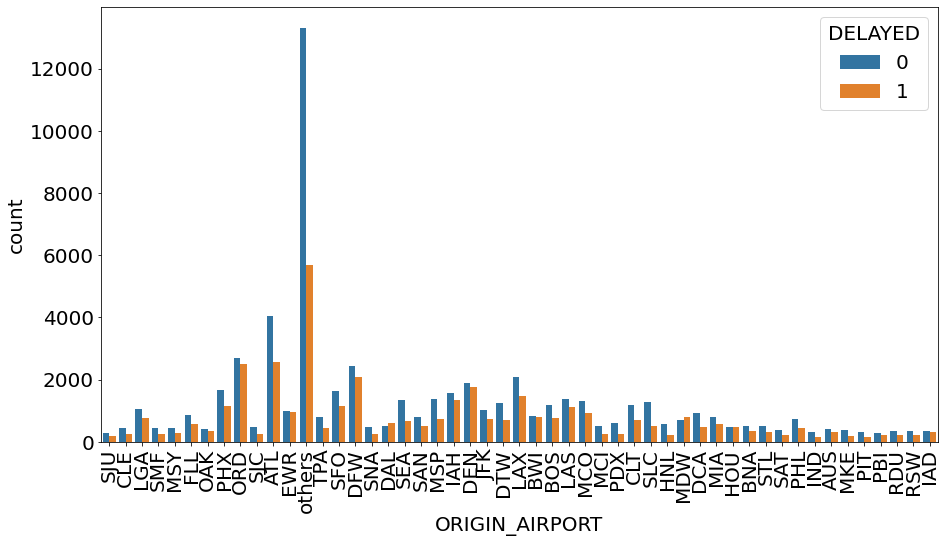

In [41]:
fig = plt.figure(figsize=(15, 8))
sns.countplot(data=Airline, x='ORIGIN_AIRPORT', hue='DELAYED')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='DESTINATION_AIRPORT', ylabel='count'>

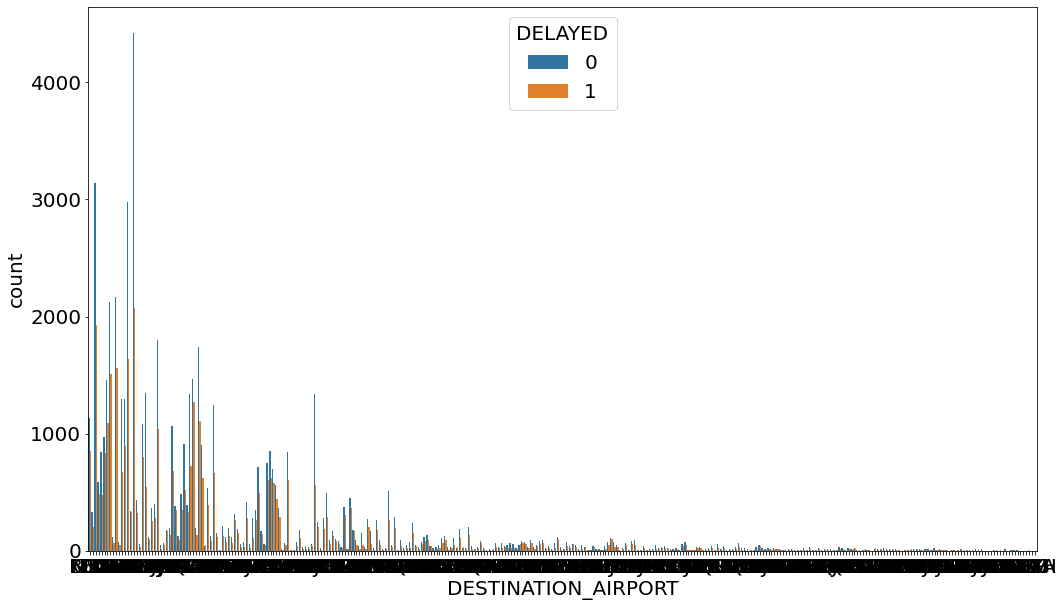

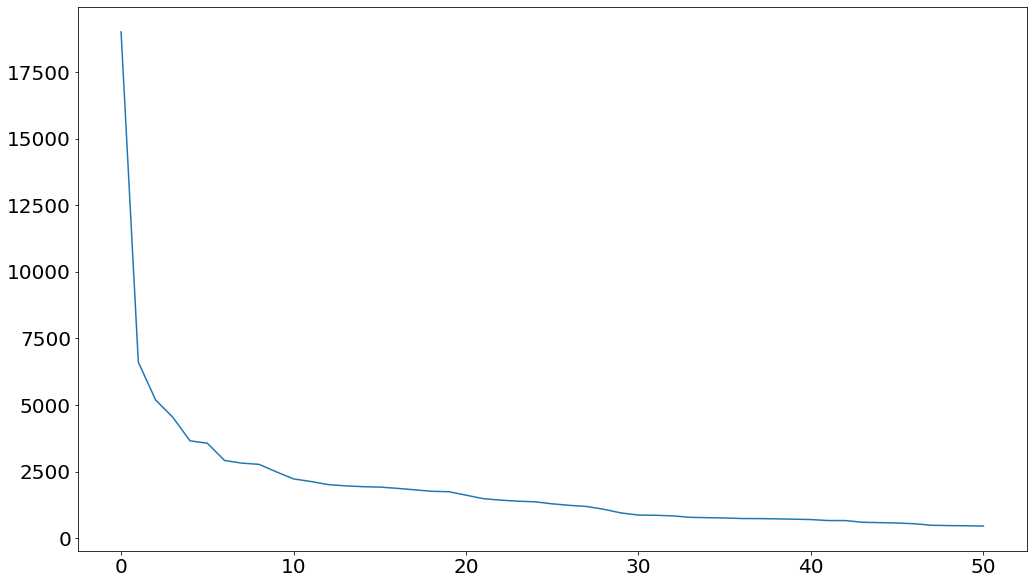

In [43]:
airto = Airline['DESTINATION_AIRPORT'].value_counts()
plt.plot(range(len(airto)), airto)

In [44]:
Airline['DESTINATION_AIRPORT'] = Airline['DESTINATION_AIRPORT'].apply(lambda s: s if str(s) in airto[:50] else 'others')

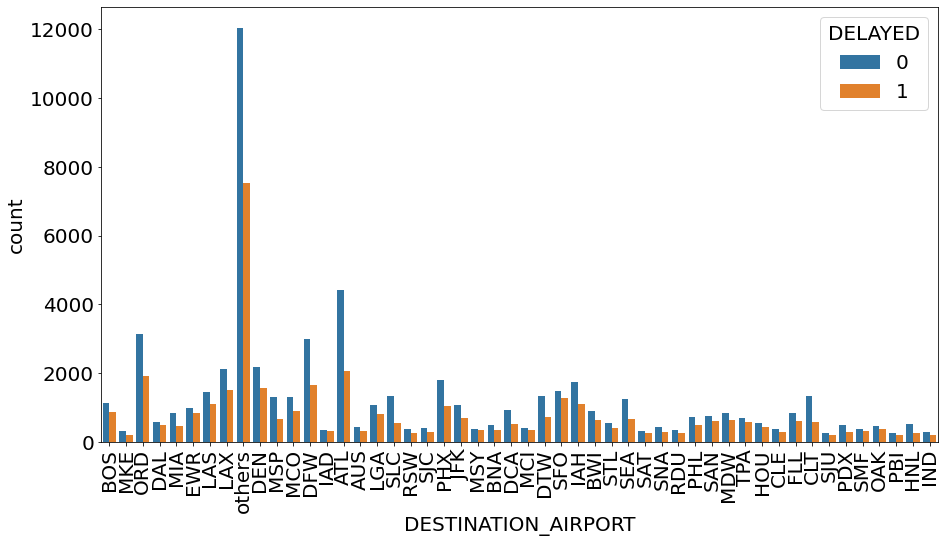

In [45]:
fig = plt.figure(figsize=(15, 8))
sns.countplot(data=Airline, x='DESTINATION_AIRPORT', hue='DELAYED')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='DAY', ylabel='count'>

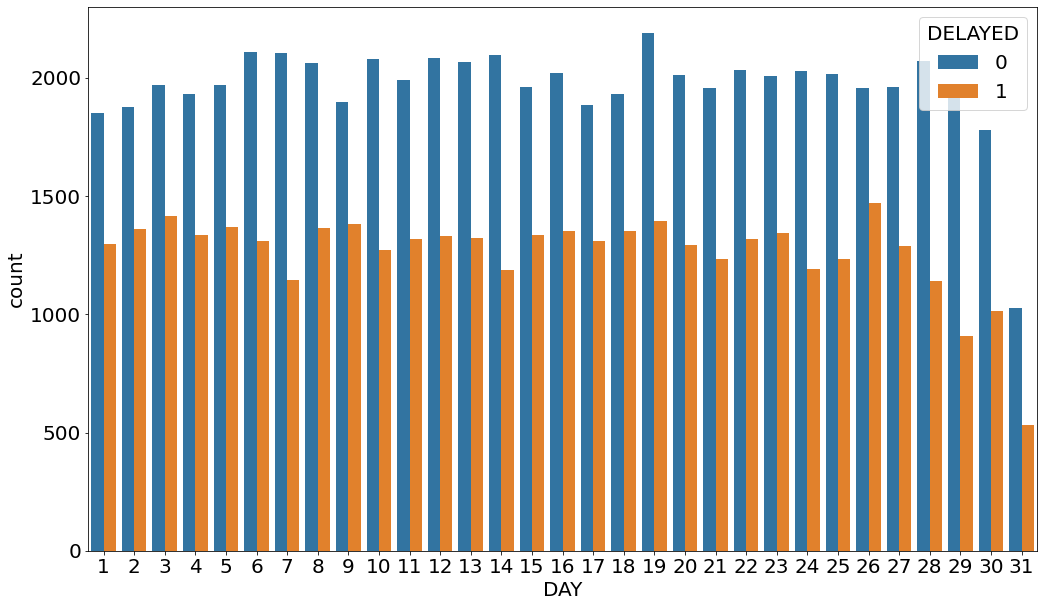

In [46]:
sns.countplot(data=Airline, x='DAY', hue='DELAYED')